<a href="https://colab.research.google.com/github/sergekamanzi/Nithub/blob/main/Bonus_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
final_data=pd.read_csv('/content/final_dataset_ready_5.csv')
final_data.head()

,product_category,customer_rating,engagement_score,CustomerEngagementScore,TransactionAmount_MA,Month,MonthlyTotalSpent,negative,neutral,positive
0,4,2.3,70.0,0.421121,0.902164,1,0.039589,1.0,0.0,0.0
1,2,4.2,52.0,0.089961,0.800382,1,0.266203,0.0,0.0,1.0
2,2,4.2,0.0,0.000000,0.800382,1,0.266203,0.0,0.0,0.0
3,2,4.2,0.0,0.000000,0.800382,1,0.266203,0.0,0.0,0.0
4,2,4.2,86.0,0.731421,0.800382,1,0.266203,1.0,0.0,0.0


In [5]:
# Ensure column names are stripped of whitespace
final_data.columns = final_data.columns.str.strip()

In [6]:
#Define Features (X) and Target (y)
X = final_data.drop(columns=['product_category'], errors='ignore')
y = final_data['product_category']

In [7]:
#Handle Missing Values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)
final_data['CustomerEngagementScore'].fillna(0, inplace=True)

In [8]:
final_data.isnull().sum()

,0
product_category,0
customer_rating,0
engagement_score,0
CustomerEngagementScore,0
TransactionAmount_MA,0
Month,0
MonthlyTotalSpent,0
negative,0
neutral,0
positive,0


In [9]:
#Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
#Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
#Make Predictions
y_pred = model.predict(X_test)

In [13]:
#Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.06
R-squared Score (R2): 0.97


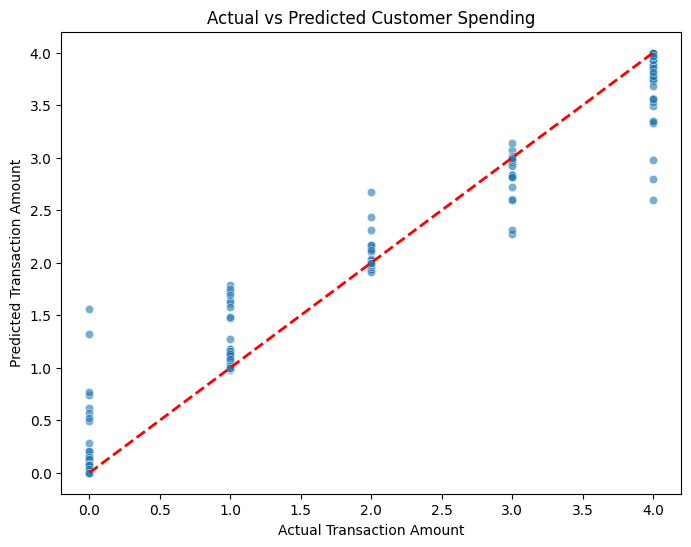

In [14]:
# Plot Actual vs. Predicted Values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Transaction Amount")
plt.ylabel("Predicted Transaction Amount")
plt.title("Actual vs Predicted Customer Spending")
plt.show()